In [11]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../..")

import pandas as pd
import seaborn as sns
from plot_config import savefig

from xlstm_scaling_laws.analysis.tokenparam.plot_flop_vs_loss_loglog_slopes import (
    create_training_flop_token_multiplier_loglog_plot_with_fits,
    get_combined_flop_loss_loglog_slope_plot,
)
from xlstm_scaling_laws.fitting.fit_tokenparam_slopes import create_slope_summary_df
from xlstm_scaling_laws.load_data import create_token_param_ratio_data_table

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Final Paper Plots

Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx8192_gbs512, id=hphy3hsq, path=['xlstm', 'xlstm_jax', 'hphy3hsq'], created_at=2024-11-06T22:21:03Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx81

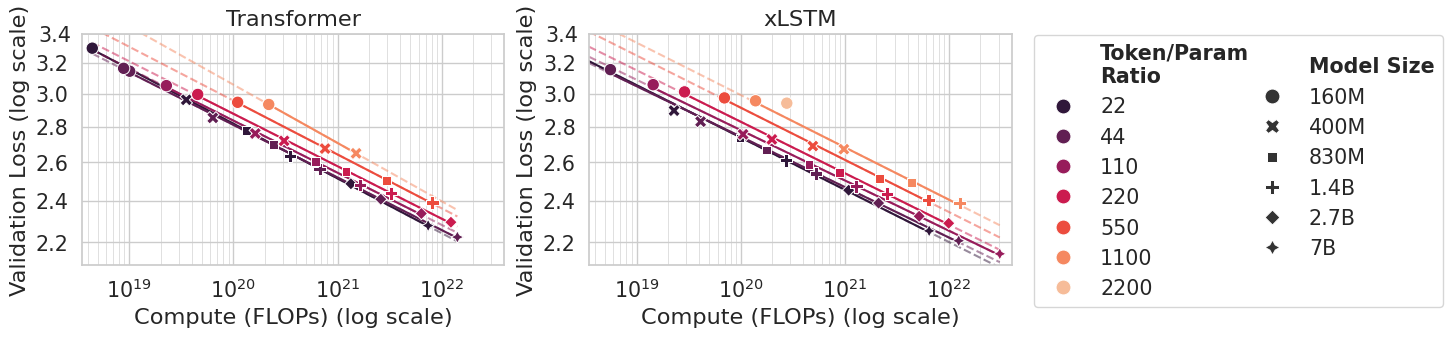

In [2]:
with sns.plotting_context("notebook", font_scale=1.35):
    with sns.axes_style("whitegrid"):
        fig = get_combined_flop_loss_loglog_slope_plot(figsize=(12, 3))

In [3]:
savefig(fig, "plot_tokenparam_loss_vs_flop_slopes")

In [4]:
mlstm_df_final = create_token_param_ratio_data_table(
    model_data="mlstm", mlstm_fw_flop_calc_mode="tfla"
)
llama_df_final = create_token_param_ratio_data_table(
    model_data="llama", attention_flop_calc_mode="distill_scaling"
)

Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx8192_gbs512, id=hphy3hsq, path=['xlstm', 'xlstm_jax', 'hphy3hsq'], created_at=2024-11-06T22:21:03Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx81

In [5]:
# remove extra token param rows and 7B long run from data
mlstm_df_final = mlstm_df_final[~(mlstm_df_final["Model Size"] == "7B long")]
mlstm_df_final = mlstm_df_final[
    ~(mlstm_df_final["Preset Token Param Ratio"] == "extra")
]
llama_df_final = llama_df_final[
    ~(llama_df_final["Preset Token Param Ratio"] == "extra")
]

In [9]:
token_param_ratios = [22, 44, 110, 220, 550, 1100]
tp_df_mlstm = create_slope_summary_df(
    all_token_param_ratios_df=mlstm_df_final, token_param_ratios=token_param_ratios
)
tp_df_mlstm.style

,slope,intercept,stderr_slope,stderr_intercept
22,-0.047398,3.190065,0.000002,0.004661
44,-0.045730,3.114932,0.000001,0.002427
110,-0.045611,3.123113,0.000001,0.001553
220,-0.046663,3.189004,0.000001,0.002257
550,-0.047288,3.247128,0.000003,0.006026
1100,-0.047442,3.280609,0.000003,0.006855


In [10]:
token_param_ratios = [22, 44, 110, 220, 550, 1100]
tp_df_llama = create_slope_summary_df(
    all_token_param_ratios_df=llama_df_final, token_param_ratios=token_param_ratios
)
tp_df_llama.style

/home/max/myrepos/nxai_public/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/fitting/fit_tokenparam_slopes.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f=linear_fit, xdata=x, ydata=y)


,slope,intercept,stderr_slope,stderr_intercept
22,-0.049611,3.320622,0.000000,0.000898
44,-0.047659,3.228239,0.000000,0.000652
110,-0.047257,3.218677,0.000001,0.001384
220,-0.047538,3.245848,0.000000,0.001089
550,-0.048799,3.331323,0.000001,0.001242
1100,-0.052825,3.550011,inf,inf


In [14]:
col = "slope"
combined_df = pd.concat(
    [tp_df_llama[col].rename("Transformer"), tp_df_mlstm[col].rename("xLSTM")], axis=1
) * (-1)
combined_df

,Transformer,xLSTM
22,0.049611,0.047398
44,0.047659,0.045730
110,0.047257,0.045611
220,0.047538,0.046663
550,0.048799,0.047288
1100,0.052825,0.047442


In [15]:
print(
    combined_df.to_latex(
        float_format="%.3f",
        label="tab:tokenparam_slopes",
        index=True,
        header=True,
        escape=False,
    )
)

\begin{table}
\label{tab:tokenparam_slopes}
\begin{tabular}{lrr}
\toprule
 & Transformer & xLSTM \\
\midrule
22 & 0.050 & 0.047 \\
44 & 0.048 & 0.046 \\
110 & 0.047 & 0.046 \\
220 & 0.048 & 0.047 \\
550 & 0.049 & 0.047 \\
1100 & 0.053 & 0.047 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
################

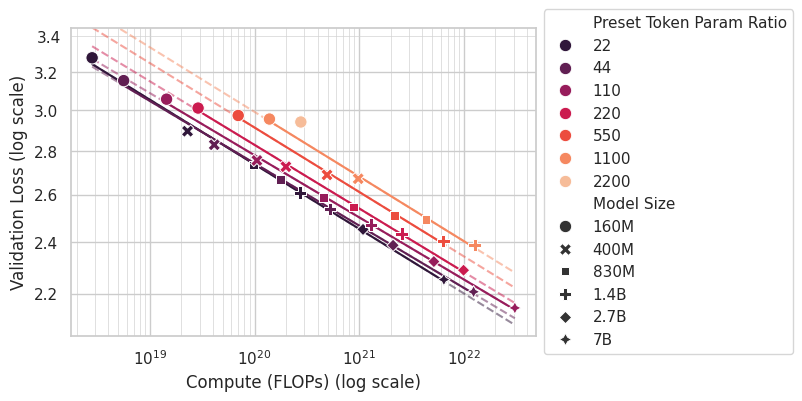

In [19]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = create_training_flop_token_multiplier_loglog_plot_with_fits(
            data_df=mlstm_df_final,
            figsize=(6, 4),
            fit_mode="interpolate_extrapolate",
            last_token_param_ratio_is_extra=False,
        )

/home/max/myrepos/nxai_public/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/fitting/fit_tokenparam_slopes.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f=linear_fit, xdata=x, ydata=y)


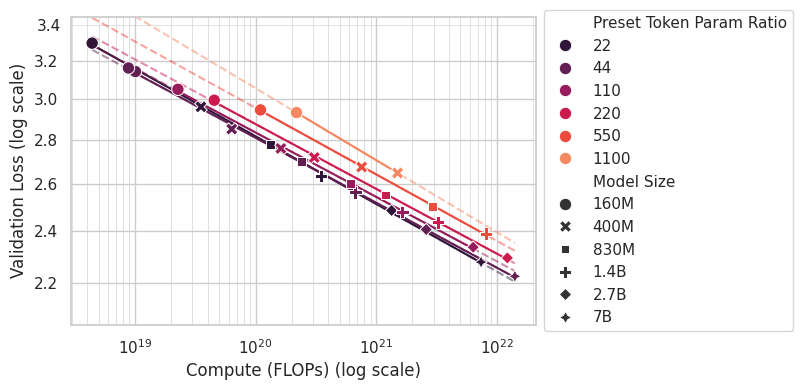

In [20]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = create_training_flop_token_multiplier_loglog_plot_with_fits(
            data_df=llama_df_final,
            figsize=(6, 4),
            fit_mode="interpolate_extrapolate",
            last_token_param_ratio_is_extra=False,
        )

# Single Plots

In [22]:
attention_flop_calc_mode = "distill_scaling"

mlstm_scl_df_first = create_token_param_ratio_data_table(
    model_data="mlstm", mlstm_fw_flop_calc_mode="first"
)
mlstm_scl_df_tfla = create_token_param_ratio_data_table(
    model_data="mlstm", mlstm_fw_flop_calc_mode="tfla"
)
llama_scl_df_chinchilla = create_token_param_ratio_data_table(
    model_data="llama", attention_flop_calc_mode="chinchilla"
)
llama_scl_df_distill_scaling = create_token_param_ratio_data_table(
    model_data="llama", attention_flop_calc_mode="distill_scaling"
)
combined_scl_df = create_token_param_ratio_data_table(
    model_data="combined", attention_flop_calc_mode=attention_flop_calc_mode
)

Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx8192_gbs512, id=hphy3hsq, path=['xlstm', 'xlstm_jax', 'hphy3hsq'], created_at=2024-11-06T22:21:03Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx81

In [23]:
columns = [
    "Model Size",
    "Model Type",
    "num_params",
    "num_tokens_training",
    "Preset Token Param Ratio",
    "token_param_ratio",
    "num_flops_training",
    "val/.dclm_loss",
]

mlstm_scl_df_tfla[columns]

,Model Size,Model Type,num_params,num_tokens_training,Preset Token Param Ratio,token_param_ratio,num_flops_training,val/.dclm_loss
0,160M,mLSTM,1.641102e+08,3.670016e+09,22,22.363116,2.809678e+18,3.278110
1,160M,mLSTM,1.641102e+08,5.242880e+09,extra,31.947309,4.013825e+18,3.210274
2,160M,mLSTM,1.641102e+08,7.340032e+09,44,44.726232,5.619355e+18,3.154124
3,160M,mLSTM,1.641102e+08,8.388608e+09,extra,51.115694,6.422120e+18,3.137508
4,160M,mLSTM,1.641102e+08,1.887437e+10,110,115.010312,1.444977e+19,3.056696
5,160M,mLSTM,1.641102e+08,3.774874e+10,220,230.020623,2.889954e+19,3.011088
6,160M,mLSTM,1.641102e+08,9.122611e+10,550,555.883173,6.984056e+19,2.973537
7,160M,mLSTM,1.641102e+08,1.814036e+11,1100,1105.376884,1.388783e+20,2.955700
8,160M,mLSTM,1.641102e+08,3.617587e+11,2200,2204.364306,2.769539e+20,2.941048
9,400M,mLSTM,4.068569e+08,1.048576e+10,22,25.772600,2.290963e+19,2.895737


In [24]:
mlstm_scl_df_tfla[["Model Size", "token_param_ratio", "Preset Token Param Ratio"]]

,Model Size,token_param_ratio,Preset Token Param Ratio
0,160M,22.363116,22
1,160M,31.947309,extra
2,160M,44.726232,44
3,160M,51.115694,extra
4,160M,115.010312,110
5,160M,230.020623,220
6,160M,555.883173,550
7,160M,1105.376884,1100
8,160M,2204.364306,2200
9,400M,25.772600,22


In [25]:
llama_scl_df_distill_scaling[
    ["Model Size", "token_param_ratio", "Preset Token Param Ratio"]
]

,Model Size,token_param_ratio,Preset Token Param Ratio
0,160M,22.623585,22
1,160M,32.319407,extra
2,160M,45.247169,44
3,160M,51.711051,44
4,160M,116.349864,110
5,160M,232.699728,220
6,160M,562.357675,550
7,160M,1118.251470,1100
8,400M,25.786631,22
9,400M,46.415935,44


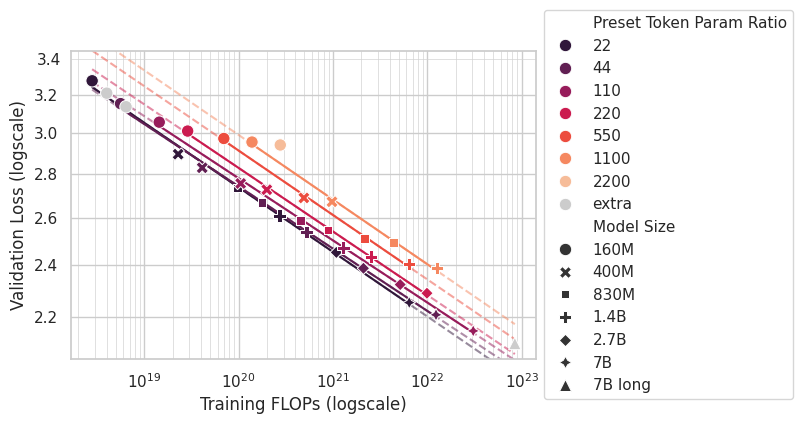

In [33]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = create_training_flop_token_multiplier_loglog_plot_with_fits(
            data_df=mlstm_scl_df_first,
            figsize=(6, 4),
            fit_mode="interpolate_extrapolate",
        )

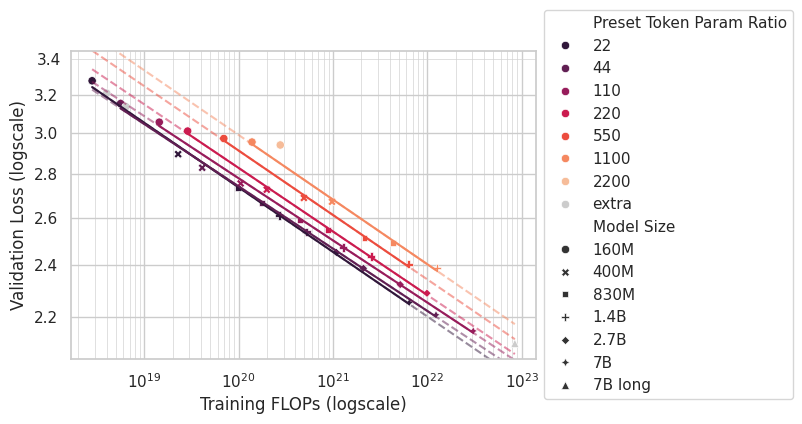

In [27]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = create_training_flop_token_multiplier_loglog_plot_with_fits(
            data_df=mlstm_scl_df_tfla,
            figsize=(6, 4),
            fit_mode="interpolate_extrapolate",
        )

/system/user/publicwork/kschweig/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/fitting/fit_tokenparam_slopes.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f=linear_fit, xdata=x, ydata=y)


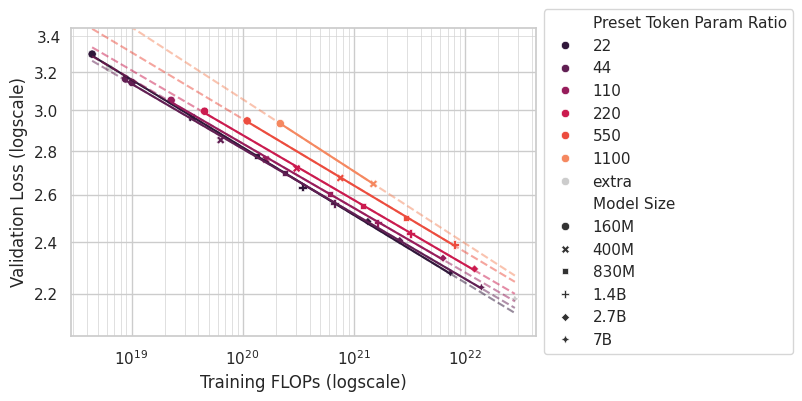

In [28]:
# attention_flop_calc_mode = "distill_scaling"
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = create_training_flop_token_multiplier_loglog_plot_with_fits(
            data_df=llama_scl_df_distill_scaling,
            figsize=(6, 4),
            fit_mode="interpolate_extrapolate",
        )

/system/user/publicwork/kschweig/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/fitting/fit_tokenparam_slopes.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f=linear_fit, xdata=x, ydata=y)


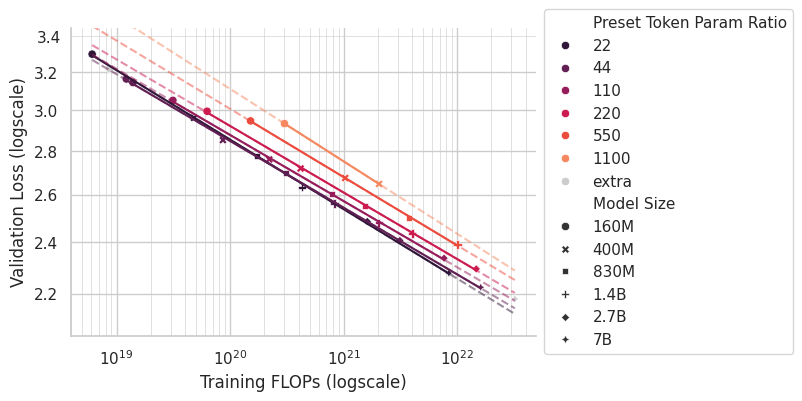

In [19]:
# attention_flop_calc_mode = "chinchilla"
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = create_training_flop_token_multiplier_loglog_plot_with_fits(
            data_df=llama_scl_df_chinchilla,
            figsize=(6, 4),
            fit_mode="interpolate_extrapolate",
        )

In [11]:
token_param_ratios = [22, 44, 110, 220, 550, 1100]
create_slope_summary_df(
    all_token_param_ratios_df=mlstm_scl_df_first, token_param_ratios=token_param_ratios
)

,slope,intercept,stderr_slope,stderr_intercept
22,-0.047399,3.190080,2.152740e-06,0.004662
44,-0.045731,3.114946,1.090569e-06,0.002427
110,-0.045612,3.123128,6.716480e-07,0.001553
220,-0.046664,3.189022,9.802050e-07,0.002257
550,-0.047289,3.247150,2.594203e-06,0.006026
1100,-0.047442,3.280632,2.868419e-06,0.006855


In [12]:
token_param_ratios = [22, 44, 110, 220, 550, 1100]
create_slope_summary_df(
    all_token_param_ratios_df=mlstm_scl_df_tfla, token_param_ratios=token_param_ratios
)

,slope,intercept,stderr_slope,stderr_intercept
22,-0.047398,3.190065,2.152637e-06,0.004661
44,-0.045730,3.114932,1.090488e-06,0.002427
110,-0.045611,3.123113,6.715788e-07,0.001553
220,-0.046663,3.189004,9.801060e-07,0.002257
550,-0.047288,3.247127,2.594050e-06,0.006026
1100,-0.047442,3.280609,2.868255e-06,0.006855


In [10]:
token_param_ratios = [22, 44, 110, 220, 550, 1100]
create_slope_summary_df(
    all_token_param_ratios_df=llama_scl_df_distill_scaling,
    token_param_ratios=token_param_ratios,
)

/system/user/publicwork/kschweig/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/fitting/fit_tokenparam_slopes.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f=linear_fit, xdata=x, ydata=y)


,slope,intercept,stderr_slope,stderr_intercept
22,-0.049611,3.320622,4.096327e-07,0.000898
44,-0.047659,3.228239,2.958447e-07,0.000652
110,-0.047257,3.218677,6.095813e-07,0.001384
220,-0.047538,3.245848,4.666303e-07,0.001089
550,-0.048799,3.331323,5.269054e-07,0.001242
1100,-0.052825,3.550011,inf,inf


In [11]:
token_param_ratios = [22, 44, 110, 220, 550, 1100]
create_slope_summary_df(
    all_token_param_ratios_df=llama_scl_df_chinchilla,
    token_param_ratios=token_param_ratios,
)

/system/user/publicwork/kschweig/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/fitting/fit_tokenparam_slopes.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f=linear_fit, xdata=x, ydata=y)


,slope,intercept,stderr_slope,stderr_intercept
22,-0.051005,3.397770,4.212440e-07,0.000933
44,-0.048962,3.301385,2.181292e-07,0.000486
110,-0.048549,3.292546,4.511494e-07,0.001035
220,-0.048846,3.321391,3.136570e-07,0.000740
550,-0.050102,3.408205,3.076114e-07,0.000733
1100,-0.053172,3.583288,inf,inf


In [12]:
# llama has a steeper slope in the overtraining regime
# accounting for causality in flop calculation (i.e. using the distill scaling flop counts) the slope is less steep